In [5]:
import mujoco_py as mjpy
import numpy as np
from gym import spaces
from rotations import *
import utils
import ikpy

model_path='model/ur5gripper.xml'
nsubsteps=50  # wait to set
model=mjpy.load_model_from_path(model_path)
sim=mjpy.MjSim(model, nsubsteps=nsubsteps)
#viewer=mjpy.MjViewerBasic(sim) # wait for rendering def
data=sim.data

ee_position=[0,0,0]
ee_position_base= (ee_position-sim.data.body_xpos[model.body_name2id("UR5:base_link")])
ee_chain=ikpy.chain.Chain.from_urdf_file("model/ur5_gripper.urdf")

sim.model.body_quat

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.70710678,  0.        ,  0.70710678,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.70710678,  0.        ,  0.70710678,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.70710678,  0.        ,  0.        ,  0.70710678],
       [ 0.70710678, -0.70710678,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  0.

In [6]:
sim.data.qpos[:]
sim.data.get_body_xquat("object")
arm_name=["_".join( name.split( ":" )[  : ] ) for name in model.joint_names if "UR5" in name and "gripper" not in name]
# gripper_name=
# len(model.joint_names)
print(arm_name)
print(len(sim.model.body_quat))
name_arr=[name for name in model.body_names if "UR5" in name or "object" in name]
dict_name={name:sim.model.body_name2id(name) for name in name_arr}
for i in range(len(name_arr)):
    dict_name.update({name_arr[i]:sim.model.body_name2id(name_arr[i])})
print(dict_name)
# sim.model.body_quat[dict_name["object"]]=[1, 0, 0, 0]
print(model.body_quat[dict_name["object"]])
sim.data.ctrl

['UR5_shoulder_pan_joint', 'UR5_shoulder_lift_joint', 'UR5_elbow_joint', 'UR5_wrist_1_joint', 'UR5_wrist_2_joint', 'UR5_wrist_3_joint', 'UR5_base_to_lik', 'UR5_base_to_rik']
22
{'UR5:base_link': 3, 'UR5:shoulder_link': 4, 'UR5:upper_arm_link': 5, 'UR5:forearm_link': 6, 'UR5:wrist_1_link': 7, 'UR5:wrist_2_link': 8, 'UR5:wrist_3_link': 9, 'UR5:ee_link': 10, 'UR5:robotiq_85_base_link': 11, 'UR5:left_inner_knuckle': 12, 'UR5:left_inner_finger': 13, 'UR5:right_inner_knuckle': 14, 'UR5:right_inner_finger': 15, 'object': 16}
[1. 0. 0. 0.]


array([0., 0., 0., 0., 0., 0., 0., 0.])

In [58]:
name_arr={name:idx for idx,name in enumerate(model.joint_names) if "UR5" in name}
print(name_arr)
for name in name_arr:
    if "gripper" not in name_arr:
        print(sim.data.qpos[name_arr[name]])

{'UR5:shoulder_pan_joint': 0, 'UR5:shoulder_lift_joint': 1, 'UR5:elbow_joint': 2, 'UR5:wrist_1_joint': 3, 'UR5:wrist_2_joint': 4, 'UR5:wrist_3_joint': 5, 'UR5:r_gripper_finger_joint': 6, 'UR5:l_gripper_finger_joint': 7}
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


[0.5, 0.3, 0.1] [0.49999995 0.29999999 0.09999999] [4.57089800e-08 7.49645107e-09 1.19523667e-08]
joint angle 2: [ 0.00000000e+00  3.52118003e-01 -1.07163915e+00  1.86660349e+00
 -2.36576069e+00 -1.57079636e+00  1.82750545e-09  0.00000000e+00]


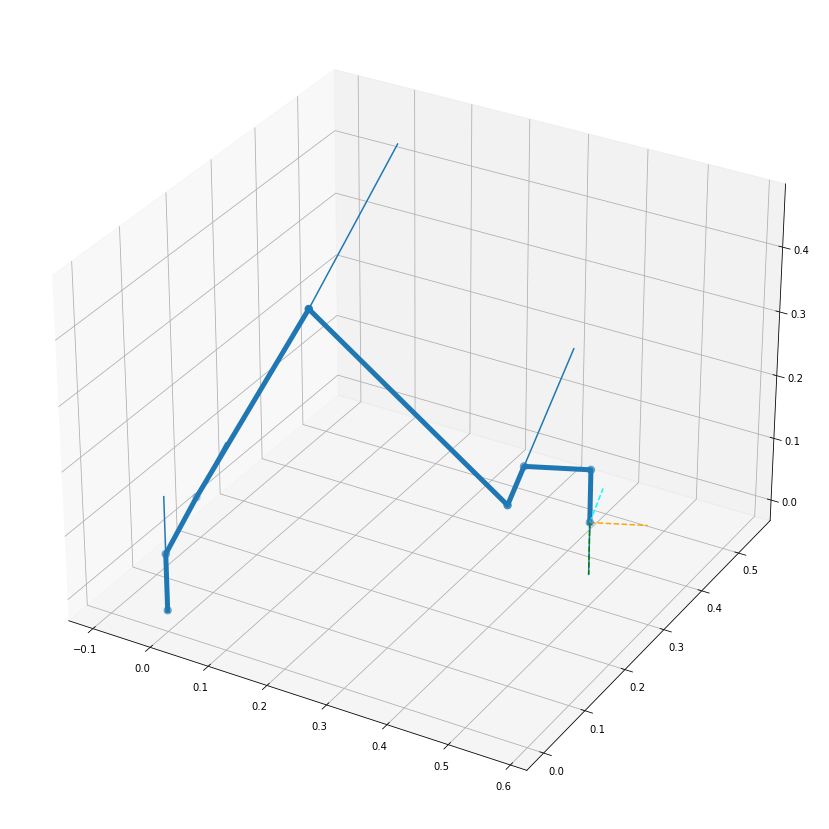

In [94]:
# this is for inverse kinematics plot check
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ee_position=[0.5,0.3,0.1]
ur52=ikpy.chain.Chain.from_urdf_file("model/ur5_gripper.urdf")
fig=plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ja2=ur52.inverse_kinematics(ee_position, [0, 0, -1], orientation_mode="X")
ur52.plot(ja2,ax)
print(ee_position,np.array((ur52.forward_kinematics(ja2)[:3, 3])), )
print("joint angle 2:",np.array(ja2))
plt.show()

In [105]:
# this is for generating the task board geometry and position
board_length=0.05
hole_length=0.0216
big_long=board_length
big_short=(board_length-hole_length)/2
small_long= hole_length
small_short=big_short
print(f"The geometry is that: small_long:{small_long/2}\tsmall_short:{small_short/2}\nbig_long:{big_long/2}\tbig_short:{big_short/2}")
big_center_offset=0.5*(hole_length+big_short)
small_center_offset=0.5*(hole_length+small_short)
print(f'The offsets are that: small offset: {small_center_offset}, big offset: {big_center_offset}')

The geometry is that: small_long:0.0108	small_short:0.0071
big_long:0.025	big_short:0.0071
The offsets are that: small offset: 0.0179, big offset: 0.0179


In [2]:
n_actuator=len(model.actuator_names)# 7
nq=len(model.joint_names)# 9 8+1 freejoint sim.data.qpos[:8]
#n_geom=len(model.geom_names)
n_actions=7
action_space=spaces.Box(-1.0, 1.0, shape=(n_actions,), dtype="float32")
has_object=True
target_range=0.1
distance_threshold=0.01
ini_gripper_xpos=sim.data.get_site_xpos("UR5:finger_site").copy()
height_offset = sim.data.get_site_xpos("object")[2]
target_offset=[0.6, 0, 1.7]
viewer=None
DEFAULT_SIZE=500



def sample_goal():
    if has_object:
        goal=ini_gripper_xpos[:3]+ np.random.uniform(-target_range, target_range, size=3)
        goal+=target_offset
        goal[2]=height_offset
    else:
        goal=ini_gripper_xpos[:3]+ np.random.uniform(-target_range, target_range, size=3)
    return goal.copy()

def get_obs(sim):

    grip_pos = sim.data.get_site_xpos("UR5:finger_site")# the mid point position of gripper
    dt = nsubsteps * sim.model.opt.timestep # 0.005=50 * 0.0001
    grip_velp=sim.data.get_site_xvelp("UR5:finger_site")*dt
    robot_qpos, robot_qvel = utils.robot_get_obs(sim)

    if has_object:
        object_pos=sim.data.get_site_xpos("object")
        # rotations
        object_rot = mat2euler(sim.data.get_site_xmat("object"))
        # velocities
        object_velp = sim.data.get_site_xvelp("object") * dt
        object_velr = sim.data.get_site_xvelr("object") * dt
        # gripper state
        object_rel_pos = object_pos - grip_pos
        object_velp -= grip_velp
    else:
        object_pos = (
            object_rot
        ) = object_velp = object_velr = object_rel_pos = np.zeros(0)

    gripper_state = robot_qpos[-2:]
    gripper_vel = (
        robot_qvel[-2:] * dt
    )  # change to a scalar if the gripper is made symmetric

    if not has_object:
        achieved_goal = grip_pos.copy()
    else:
        achieved_goal = np.squeeze(object_pos.copy())
    obs = np.concatenate(
        [
            grip_pos,
            object_pos.ravel(),
            object_rel_pos.ravel(),
            gripper_state,
            object_rot.ravel(),
            object_velp.ravel(),
            object_velr.ravel(),
            grip_velp,
            gripper_vel,
        ]
    )
    goal= sample_goal()
    return {
            "observation": obs.copy(),
            "achieved_goal": achieved_goal.copy(),
            "desired_goal": goal.copy(),
        }

def goal_distance(goal_a, goal_b):
    assert goal_a.shape == goal_b.shape
    return np.linalg.norm(goal_a - goal_b, axis=-1)

def compute_reward(achieved_goal, goal):
    d = goal_distance(achieved_goal, goal)
    return -d
    
def is_success(achieved_goal, desired_goal):
    d = goal_distance(achieved_goal, desired_goal)
    return (d < distance_threshold).astype(np.float32)

def viewer_setup():
    # wait for modify
    body_id = sim.model.body_name2id("UR5:ee_link")
    lookat = sim.data.body_xpos[body_id]
    for idx, value in enumerate(lookat):
        viewer.cam.lookat[idx] = value
    viewer.cam.distance = 2.5
    viewer.cam.azimuth = 132.0
    viewer.cam.elevation = -14.0

def get_viewer(mode):
    if mode=="human":
        viewer = mjpy.MjViewer(sim)
    elif mode == "rgb_array":
        viewer== mjpy.MjRenderContextOffscreen(sim, device_id=-1)
    viewer_setup()

    return viewer

def render_callback():
    goal= sample_goal()
    sites_offset=sim.data.site_xpos-sim.model.site_pos
    site_id=sim.model.site_name2id("UR5:finger_site")
    sim.model.site_pos[site_id] = goal - sites_offset[0]
    sim.forward()

def render(mode, width=DEFAULT_SIZE, height=DEFAULT_SIZE):
    render_callback()
    if mode == "rgb_array":
        get_viewer(mode).render(width, height)
        # window size used for old mujoco-py:
        data = get_viewer(mode).read_pixels(width, height, depth=False)
        # original image is upside-down, so flip it
        return data[::-1, :, :]
    elif mode == "human":
        get_viewer(mode).render()

def env_setup():
    for name in model.joint_names:
        if "UR5" in name:
            sim.data.set_joint_qpos(name, sim.data.get_joint_qpos(name))
            #print(name,sim.data.get_joint_qpos(name))
        sim.forward()
        ini_gripper_xpos = sim.data.get_site_xpos("UR5:finger_site").copy()

def init(qpos,qvel):
    sim.data.qpos[:nq]=qpos
    sim.data.qvel[:nq]=qvel
    sim.forward()

def step(action):
    action = np.clip(action, action_space.low, action_space.high)
    obs=get_obs(sim)

    sim.step()

def reset():
    sim.reset()

def close():
    pass

In [3]:
n_actuator=len(model.actuator_names)# 7
nq=len(model.joint_names)# 9 8+1 freejoint sim.data.qpos[:8]
#n_geom=len(model.geom_names)
n_actions=7
action_space=spaces.Box(-1.0, 1.0, shape=(n_actions,), dtype="float32")
has_object=True
target_range=0.1
distance_threshold=0.01
ini_gripper_xpos=sim.data.get_site_xpos("UR5:finger_site").copy()
height_offset = sim.data.get_site_xpos("object")[2]
target_offset=[0.6, 0, 1.7]
viewer=None
DEFAULT_SIZE=500
action=np.zeros(n_actions)
qpos=np.zeros(nq)
qvel=np.zeros(nq)
env_setup()
init(qpos,qvel)

for epoch in range (100):
    get_viewer('human')
    step(action)
    reset()


: 

: 